#  Automated Diagnosis of Eye Diseases from Retinal Images Using Machine Learning

In [1]:
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd

In [2]:
path = r"dataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories

['glaucoma', 'normal']

In [3]:
X_file = os.path.join(model_folder, "model\X.txt.npy")
Y_file = os.path.join(model_folder, "model\Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)

Loading category: []
glaucoma dataset\glaucoma/_0_4517448.jpg
Loading category: []
glaucoma dataset\glaucoma/_100_3108233.jpg
Loading category: []
glaucoma dataset\glaucoma/_100_965860.jpg
Loading category: []
glaucoma dataset\glaucoma/_101_9321817.jpg
Loading category: []
glaucoma dataset\glaucoma/_102_5502806.jpg
Loading category: []
glaucoma dataset\glaucoma/_103_1487378.jpg
Loading category: []
glaucoma dataset\glaucoma/_104_4154423.jpg
Loading category: []
glaucoma dataset\glaucoma/_104_9271975.jpg
Loading category: []
glaucoma dataset\glaucoma/_105_3766522.jpg
Loading category: []
glaucoma dataset\glaucoma/_105_9159338.jpg
Loading category: []
glaucoma dataset\glaucoma/_106_1940079.jpg
Loading category: []
glaucoma dataset\glaucoma/_106_4788402.jpg
Loading category: []
glaucoma dataset\glaucoma/_107_1720806.jpg
Loading category: []
glaucoma dataset\glaucoma/_107_7535300.jpg
Loading category: []
glaucoma dataset\glaucoma/_108_4678854.jpg
Loading category: []
glaucoma dataset\glauc

Loading category: []
glaucoma dataset\glaucoma/_196_3505519.jpg
Loading category: []
glaucoma dataset\glaucoma/_196_9338682.jpg
Loading category: []
glaucoma dataset\glaucoma/_197_5727246.jpg
Loading category: []
glaucoma dataset\glaucoma/_197_9225516.jpg
Loading category: []
glaucoma dataset\glaucoma/_198_4839828.jpg
Loading category: []
glaucoma dataset\glaucoma/_198_8291898.jpg
Loading category: []
glaucoma dataset\glaucoma/_199_1326301.jpg
Loading category: []
glaucoma dataset\glaucoma/_199_7083786.jpg
Loading category: []
glaucoma dataset\glaucoma/_19_6182574.jpg
Loading category: []
glaucoma dataset\glaucoma/_19_7932720.jpg
Loading category: []
glaucoma dataset\glaucoma/_1_4540560.jpg
Loading category: []
glaucoma dataset\glaucoma/_200_8005975.jpg
Loading category: []
glaucoma dataset\glaucoma/_201_387458.jpg
Loading category: []
glaucoma dataset\glaucoma/_201_9193232.jpg
Loading category: []
glaucoma dataset\glaucoma/_202_7508135.jpg
Loading category: []
glaucoma dataset\glaucom

Loading category: []
glaucoma dataset\glaucoma/_290_306861.jpg
Loading category: []
glaucoma dataset\glaucoma/_290_5672201.jpg
Loading category: []
glaucoma dataset\glaucoma/_291_1967456.jpg
Loading category: []
glaucoma dataset\glaucoma/_292_3590459.jpg
Loading category: []
glaucoma dataset\glaucoma/_292_3819069.jpg
Loading category: []
glaucoma dataset\glaucoma/_293_1537842.jpg
Loading category: []
glaucoma dataset\glaucoma/_293_8683971.jpg
Loading category: []
glaucoma dataset\glaucoma/_294_5527908.jpg
Loading category: []
glaucoma dataset\glaucoma/_295_3084570.jpg
Loading category: []
glaucoma dataset\glaucoma/_296_3140840.jpg
Loading category: []
glaucoma dataset\glaucoma/_296_6754407.jpg
Loading category: []
glaucoma dataset\glaucoma/_297_2792482.jpg
Loading category: []
glaucoma dataset\glaucoma/_298_2374039.jpg
Loading category: []
glaucoma dataset\glaucoma/_298_4611384.jpg
Loading category: []
glaucoma dataset\glaucoma/_299_8359089.jpg
Loading category: []
glaucoma dataset\gla

Loading category: []
glaucoma dataset\glaucoma/_69_5362173.jpg
Loading category: []
glaucoma dataset\glaucoma/_6_2143075.jpg
Loading category: []
glaucoma dataset\glaucoma/_70_4843073.jpg
Loading category: []
glaucoma dataset\glaucoma/_71_5256438.jpg
Loading category: []
glaucoma dataset\glaucoma/_71_9012457.jpg
Loading category: []
glaucoma dataset\glaucoma/_72_3474284.jpg
Loading category: []
glaucoma dataset\glaucoma/_73_1527609.jpg
Loading category: []
glaucoma dataset\glaucoma/_73_2704407.jpg
Loading category: []
glaucoma dataset\glaucoma/_74_2774709.jpg
Loading category: []
glaucoma dataset\glaucoma/_75_5691617.jpg
Loading category: []
glaucoma dataset\glaucoma/_75_820784.jpg
Loading category: []
glaucoma dataset\glaucoma/_76_8587652.jpg
Loading category: []
glaucoma dataset\glaucoma/_77_3641818.jpg
Loading category: []
glaucoma dataset\glaucoma/_77_7357873.jpg
Loading category: []
glaucoma dataset\glaucoma/_78_1065003.jpg
Loading category: []
glaucoma dataset\glaucoma/_79_266127

Loading category: []
normal dataset\normal/2421_right.jpg
Loading category: []
normal dataset\normal/2422_left.jpg
Loading category: []
normal dataset\normal/2422_right.jpg
Loading category: []
normal dataset\normal/2423_left.jpg
Loading category: []
normal dataset\normal/2423_right.jpg
Loading category: []
normal dataset\normal/2426_left.jpg
Loading category: []
normal dataset\normal/2426_right.jpg
Loading category: []
normal dataset\normal/2427_left.jpg
Loading category: []
normal dataset\normal/2427_right.jpg
Loading category: []
normal dataset\normal/2428_left.jpg
Loading category: []
normal dataset\normal/2432_left.jpg
Loading category: []
normal dataset\normal/2432_right.jpg
Loading category: []
normal dataset\normal/2435_left.jpg
Loading category: []
normal dataset\normal/2435_right.jpg
Loading category: []
normal dataset\normal/2437_left.jpg
Loading category: []
normal dataset\normal/2437_right.jpg
Loading category: []
normal dataset\normal/2438_left.jpg
Loading category: []
no

Loading category: []
normal dataset\normal/2576_right.jpg
Loading category: []
normal dataset\normal/2577_left.jpg
Loading category: []
normal dataset\normal/2577_right.jpg
Loading category: []
normal dataset\normal/2580_right.jpg
Loading category: []
normal dataset\normal/2583_left.jpg
Loading category: []
normal dataset\normal/2583_right.jpg
Loading category: []
normal dataset\normal/2585_left.jpg
Loading category: []
normal dataset\normal/2585_right.jpg
Loading category: []
normal dataset\normal/2586_left.jpg
Loading category: []
normal dataset\normal/2586_right.jpg
Loading category: []
normal dataset\normal/2587_left.jpg
Loading category: []
normal dataset\normal/2587_right.jpg
Loading category: []
normal dataset\normal/2588_left.jpg
Loading category: []
normal dataset\normal/2588_right.jpg
Loading category: []
normal dataset\normal/2589_right.jpg
Loading category: []
normal dataset\normal/2591_left.jpg
Loading category: []
normal dataset\normal/2591_right.jpg
Loading category: []


Loading category: []
normal dataset\normal/2718_left.jpg
Loading category: []
normal dataset\normal/2718_right.jpg
Loading category: []
normal dataset\normal/2726_left.jpg
Loading category: []
normal dataset\normal/2726_right.jpg
Loading category: []
normal dataset\normal/2728_left.jpg
Loading category: []
normal dataset\normal/2728_right.jpg
Loading category: []
normal dataset\normal/2729_left.jpg
Loading category: []
normal dataset\normal/2730_left.jpg
Loading category: []
normal dataset\normal/2730_right.jpg
Loading category: []
normal dataset\normal/2732_left.jpg
Loading category: []
normal dataset\normal/2732_right.jpg
Loading category: []
normal dataset\normal/2735_left.jpg
Loading category: []
normal dataset\normal/2735_right.jpg
Loading category: []
normal dataset\normal/2736_left.jpg
Loading category: []
normal dataset\normal/2736_right.jpg
Loading category: []
normal dataset\normal/2737_right.jpg
Loading category: []
normal dataset\normal/2740_left.jpg
Loading category: []
no

In [4]:
# checking the count plot of target variable

<AxesSubplot:ylabel='count'>

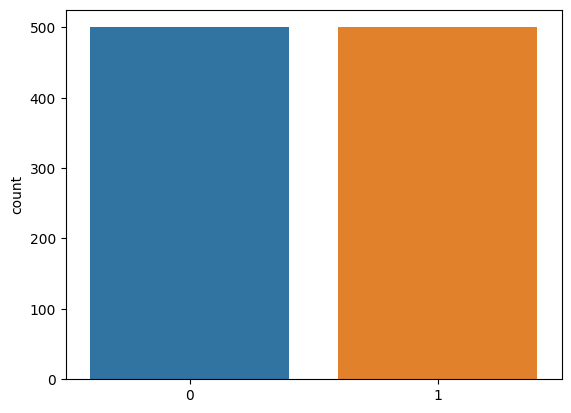

In [5]:
sns.countplot(x=Y)

In [6]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=77)

In [7]:
labels=categories

In [8]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [9]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class')

# Desicion Tree Classifier

Decision Tree Classifier model trained and model weights saved.
DecisionTreeClassifier Accuracy    : 97.71428571428571
DecisionTreeClassifier Precision   : 97.70745566767904
DecisionTreeClassifier Recall      : 97.72615897285112
DecisionTreeClassifier FSCORE      : 97.7136137967076

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

    glaucoma       0.97      0.98      0.98       177
      normal       0.98      0.97      0.98       173

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350



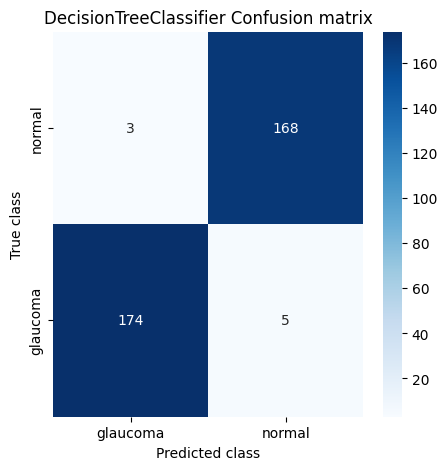

In [10]:
# Check if the pkl file exists
Model_file = os.path.join(model_folder, "DT_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    dt_classifier = joblib.load(Model_file)
    predict = dt_classifier.predict(x_test)
    calculateMetrics("DecisionTreeClassifier", predict, y_test)
else:
    # Create Random Forest Classifier with Decision Tree as base estimator
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(dt_classifier, Model_file)  
    predict = dt_classifier.predict(x_test)
    print("Decision Tree Classifier model trained and model weights saved.")
    calculateMetrics("DecisionTreeClassifier", predict, y_test)

# Random Forest Classifier

Random Forest model trained and model weights saved.
RandomForestClassifier Accuracy    : 98.57142857142858
RandomForestClassifier Precision   : 98.60347985347985
RandomForestClassifier Recall      : 98.5510797477866
RandomForestClassifier FSCORE      : 98.57001609753307

 RandomForestClassifier classification report
               precision    recall  f1-score   support

    glaucoma       0.99      0.98      0.99       182
      normal       0.98      0.99      0.99       168

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



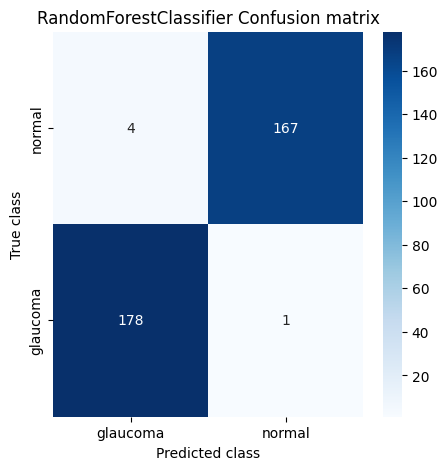

In [11]:
# Check if the pkl file exists
Model_file = os.path.join(model_folder, "RFC_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    rf_classifier = joblib.load(Model_file)
    predict = rf_classifier.predict(x_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    # Create Random Forest Classifier with Decision Tree as base estimator
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(rf_classifier, Model_file)  
    predict = rf_classifier.predict(x_test)
    print("Random Forest model trained and model weights saved.")
    calculateMetrics("RandomForestClassifier", predict, y_test)
    

In [12]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ['DecisionTreeClassifier','RandomForestClassifier']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,DecisionTreeClassifier,97.707456,97.726159,97.713614,97.714286
1,RandomForestClassifier,98.603480,98.551080,98.570016,98.571429


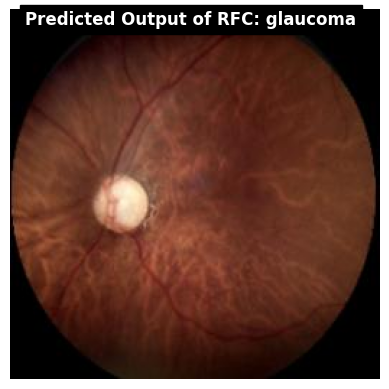

In [13]:
path=r"C:\Users\sriram\Desktop\SMEC ECE Sec-C\C8. Eye Diseases\dataset\glaucoma\_6_2143075.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()

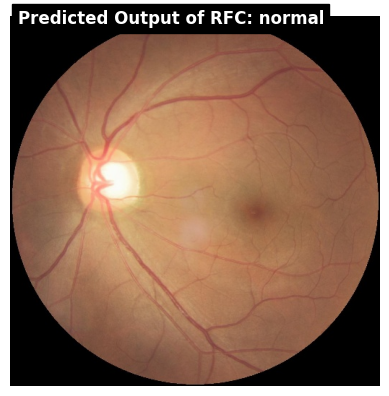

In [15]:

path=r"C:\Users\sriram\Desktop\SMEC ECE Sec-C\C8. Eye Diseases\dataset\normal\2807_left.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()